In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Введение в набор данных:

#### Обзор: Объясните контекст данных — транзакции в бразильской электронной коммерции с различных маркетплейсов.

Ссылка на датасет: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data

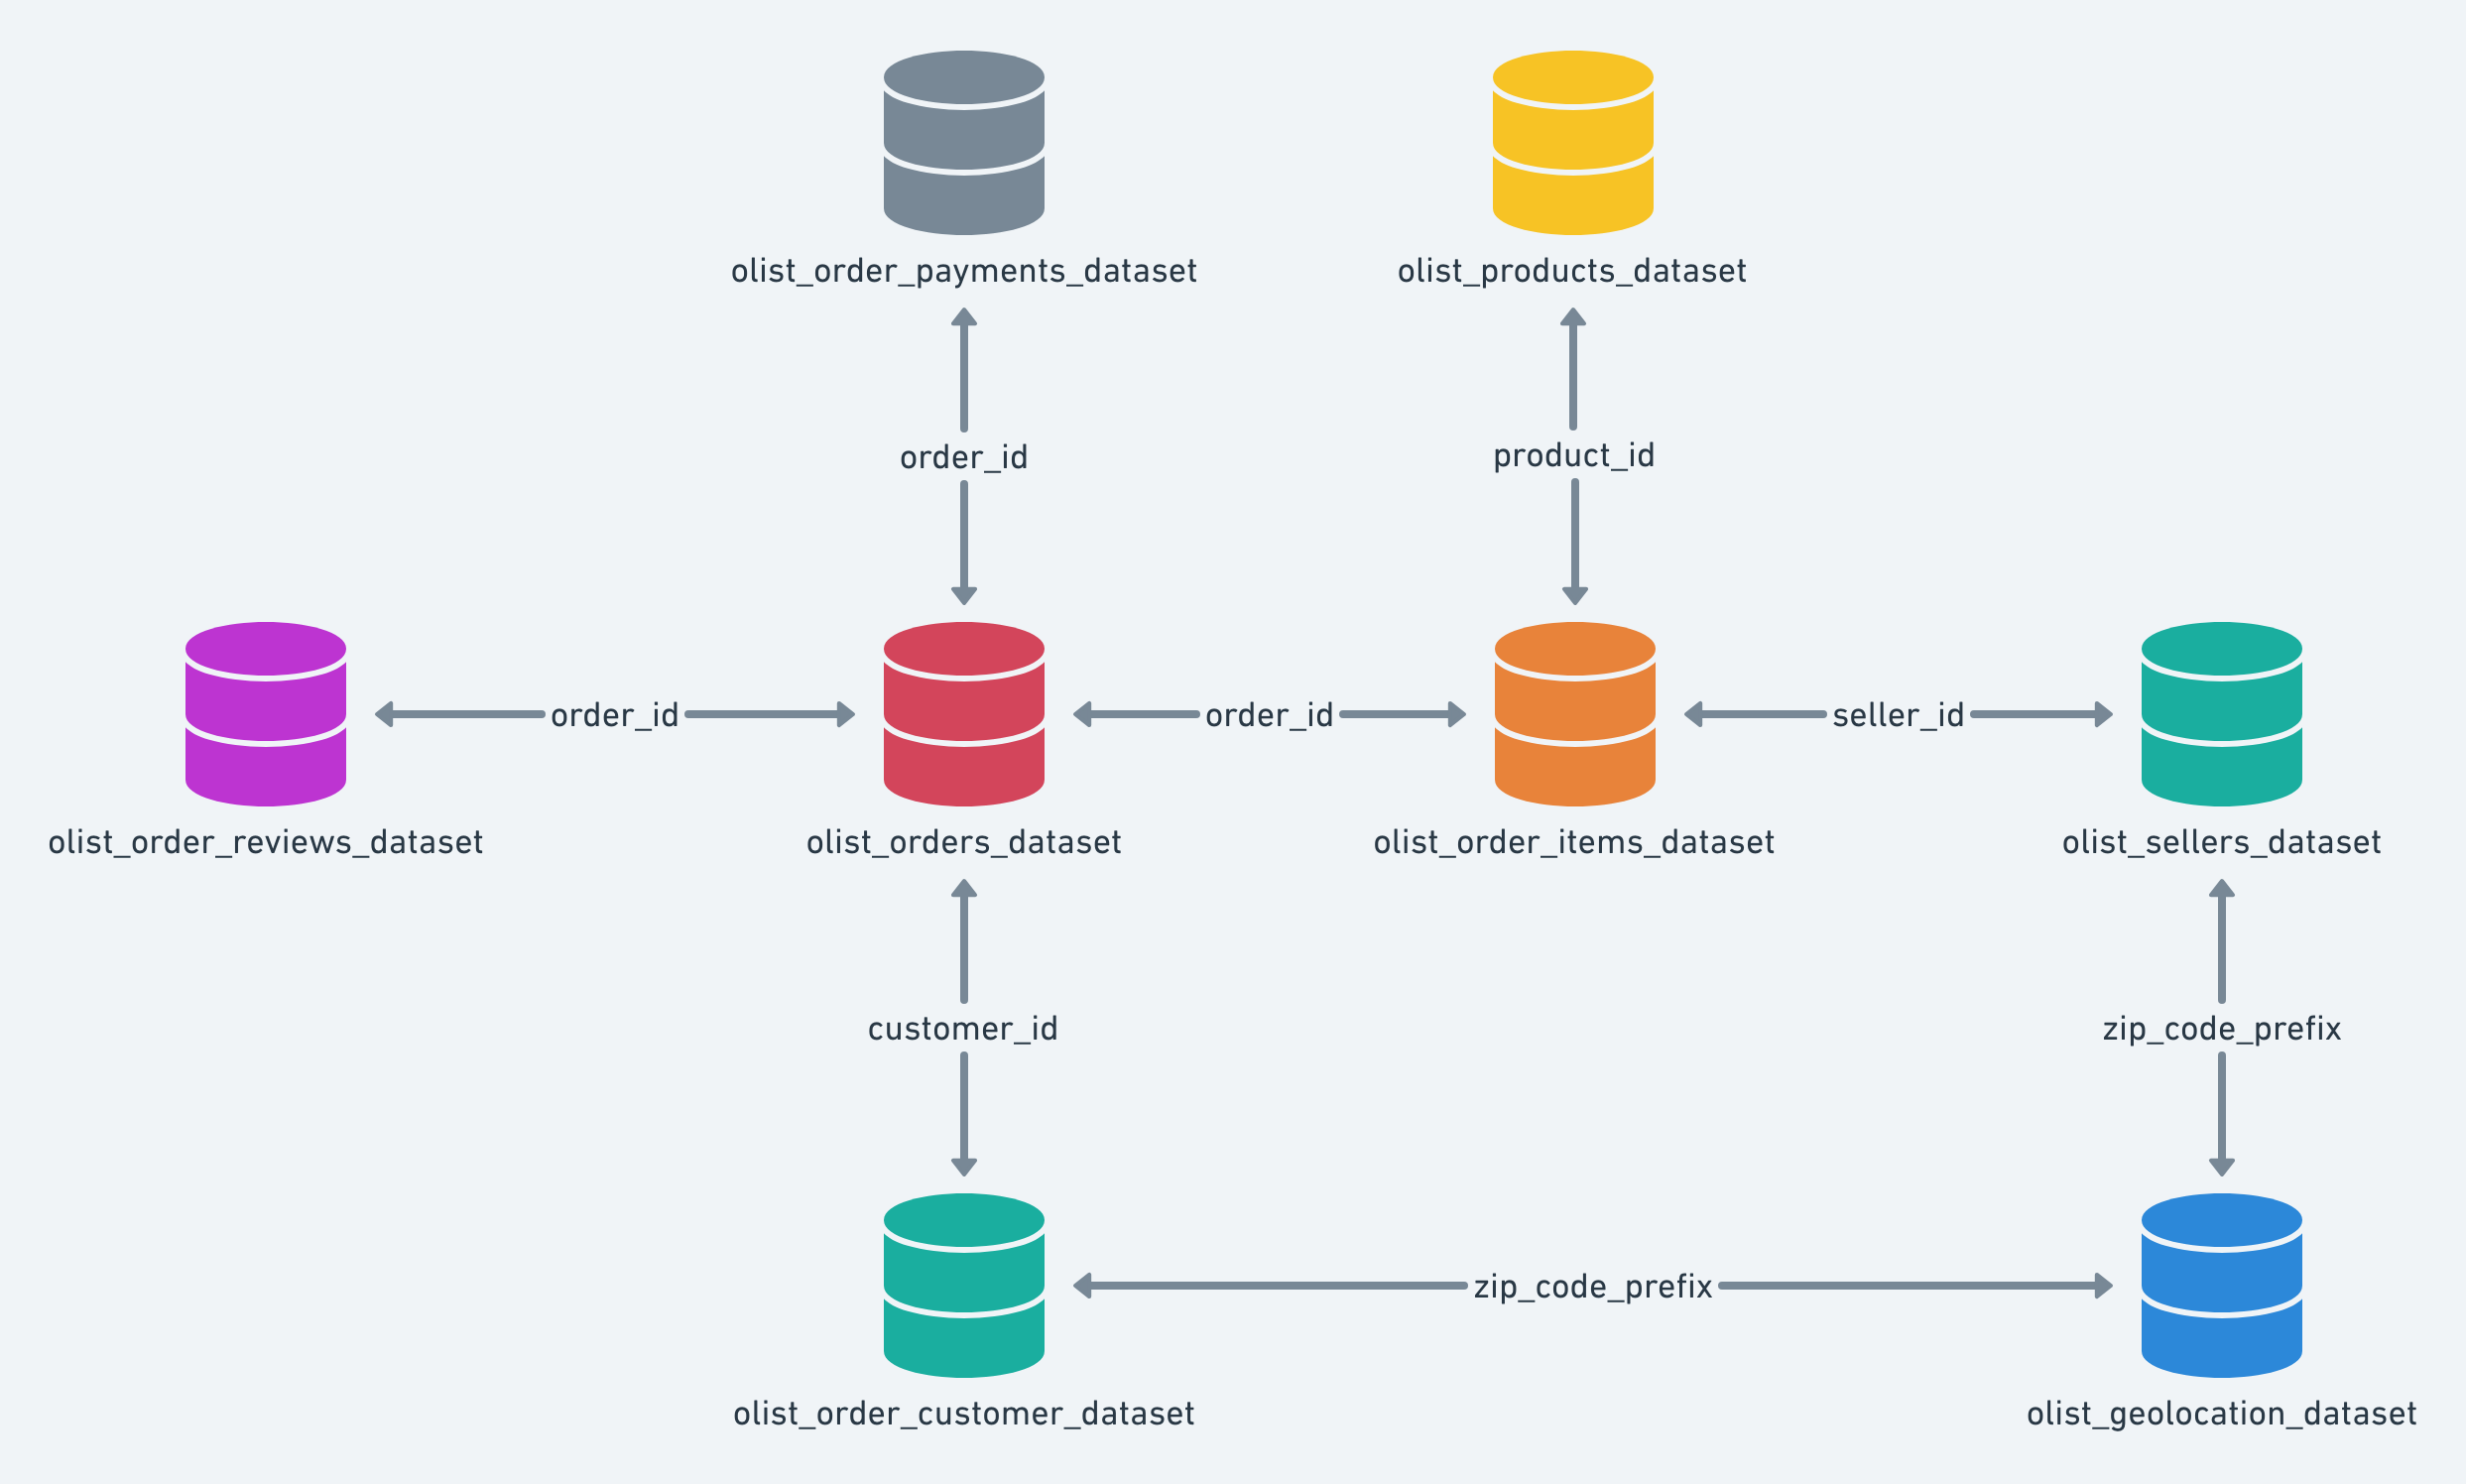

#### Файлы данных: Опишите различные файлы CSV (заказы, продукты, продавцы, клиенты, отзывы и т. д.) и их взаимосвязь.


In [2]:
# Загрузка данных: Используйте pandas для чтения CSV файлов.
orders = pd.read_csv('../data/olist_orders_dataset.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


#### Цель: Определите, чего вы хотите достичь с помощью данных (например, предсказание времени доставки, сегментация клиентов).

In [3]:
orders['in_time'] = orders.order_delivered_customer_date <= orders.order_estimated_delivery_date

In [4]:
# Assuming orders is your DataFrame
datetime_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

# Convert the specified columns to datetime format
for column in datetime_columns:
    orders[column] = pd.to_datetime(orders[column])

# Display the DataFrame to verify the changes
print(orders.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
in_time                                    bool
dtype: object


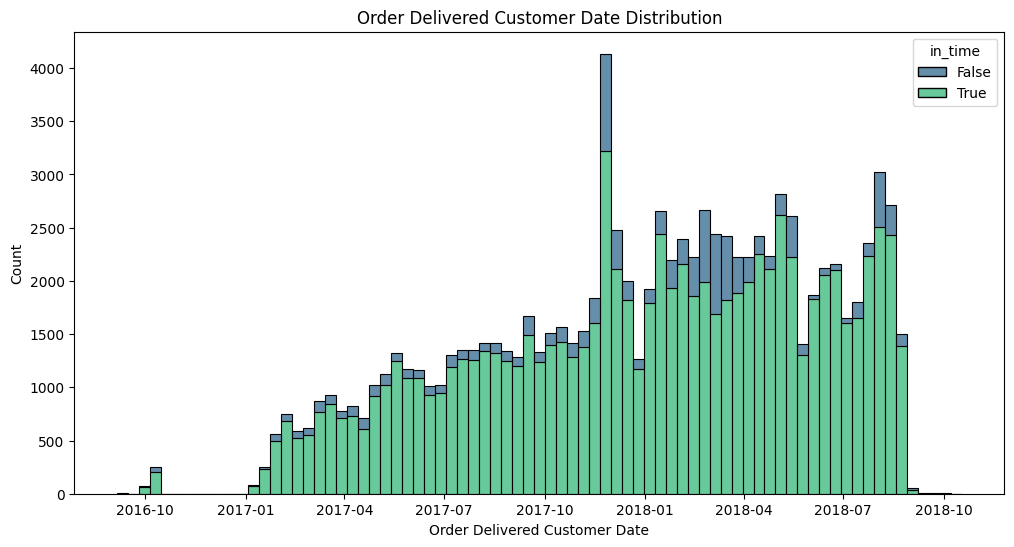

In [5]:
# Plotting histogram with fewer bins for faster execution
plt.figure(figsize=(12, 6))
sns.histplot(data=orders, x='order_purchase_timestamp', hue='in_time', multiple='stack', palette='viridis')
plt.title('Order Delivered Customer Date Distribution')
plt.xlabel('Order Delivered Customer Date')
plt.ylabel('Count')
plt.show()


Задача - предсказать заранее опоздает ли заказ или нет

### 2. Загрузка и предобработка данных:


#### Объединение данных: Объедините релевантные таблицы для создания комплексного набора данных.


In [6]:
products = pd.read_csv('../data/olist_products_dataset.csv')
order_items = pd.read_csv('../data/olist_order_items_dataset.csv')
customers = pd.read_csv('../data/olist_customers_dataset.csv')
sellers = pd.read_csv('../data/olist_sellers_dataset.csv')
geolocation = pd.read_csv('../data/olist_geolocation_dataset.csv')

In [7]:
# Step 1: Aggregate geolocation data by zip code prefix, taking the mean latitude and longitude
geolocation_agg = geolocation.groupby('geolocation_zip_code_prefix').agg(
    customer_lat=('geolocation_lat', 'mean'),
    customer_lng=('geolocation_lng', 'mean')
).reset_index()

# Step 2: Join `orders` with `order_items` on `order_id`
orders_items_df = orders.merge(order_items, on='order_id', how='left')

# Step 3: Join `orders_items_df` with `customers` on `customer_id`
orders_items_customers_df = orders_items_df.merge(customers, on='customer_id', how='left')

# Step 4: Join with `sellers` using `order_items` as a bridge (on `seller_id`)
orders_items_customers_sellers_df = orders_items_customers_df.merge(sellers, on='seller_id', how='left')

# Step 5: Join with `products` on `product_id` (through `order_items`)
full_df = orders_items_customers_sellers_df.merge(products, on='product_id', how='left')

# Step 6: Join the aggregated customer geolocation data on `customer_zip_code_prefix`
full_df = full_df.merge(
    geolocation_agg.rename(columns={
        'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
        'customer_lat': 'customer_lat',
        'customer_lng': 'customer_lng'
    }),
    left_on='customer_zip_code_prefix',
    right_on='customer_zip_code_prefix',
    how='left'
)

# Step 7: For seller geolocation, repeat aggregation and join separately
geolocation_seller_agg = geolocation.groupby('geolocation_zip_code_prefix').agg(
    seller_lat=('geolocation_lat', 'mean'),
    seller_lng=('geolocation_lng', 'mean')
).reset_index()

full_df = full_df.merge(
    geolocation_seller_agg.rename(columns={
        'geolocation_zip_code_prefix': 'seller_zip_code_prefix',
        'seller_lat': 'seller_lat',
        'seller_lng': 'seller_lng'
    }),
    left_on='seller_zip_code_prefix',
    right_on='seller_zip_code_prefix',
    how='left'
)

# Display the final DataFrame
full_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,in_time,order_item_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_lat,customer_lng,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,1.0,...,268.0,4.0,500.0,19.0,8.0,13.0,-23.576983,-46.587161,-23.680729,-46.444238
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,1.0,...,178.0,1.0,400.0,19.0,13.0,19.0,-12.177924,-44.660711,-19.807681,-43.980427
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,1.0,...,232.0,1.0,420.0,24.0,19.0,21.0,-16.745150,-48.514783,-21.363502,-48.229601
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True,1.0,...,468.0,3.0,450.0,30.0,10.0,20.0,-5.774190,-35.271143,-19.837682,-43.924053
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True,1.0,...,316.0,4.0,250.0,51.0,15.0,15.0,-23.676370,-46.514627,-23.543395,-46.262086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,True,1.0,...,828.0,4.0,4950.0,40.0,10.0,40.0,-24.001500,-46.449864,-21.930548,-50.498348
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,True,1.0,...,500.0,2.0,13300.0,32.0,90.0,22.0,-17.898358,-39.373630,-23.553642,-46.452661
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,True,1.0,...,1893.0,1.0,6550.0,20.0,20.0,20.0,-22.562825,-42.694574,-20.940578,-45.827237
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,True,2.0,...,1893.0,1.0,6550.0,20.0,20.0,20.0,-22.562825,-42.694574,-20.940578,-45.827237



#### Очистка данных: Обработайте пропуски, дубликаты и несоответствующие типы данных.


In [8]:
full_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'in_time', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_lat', 'customer_lng', 'seller_lat', 'seller_lng'],
      dtype='object')

In [9]:
full_df.shape, full_df.order_id.unique().shape

((113425, 34), (99441,))

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
nan_counts = full_df.isna().sum()
print(nan_counts)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
in_time                             0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix            775
seller_city                       775
seller_state                      775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weig

In [12]:
cols2drop_data_leak = ['order_delivered_carrier_date', 'order_delivered_customer_date', 'order_status']
cols2drop_index = ['customer_id', 'customer_unique_id']
full_df_dropped = full_df.drop(cols2drop_data_leak, axis=1)
full_df_dropped.dropna(inplace=True)
full_df_dropped

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,in_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_lat,customer_lng,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,True,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,-23.576983,-46.587161,-23.680729,-46.444238
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,True,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.0,belo horizonte,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,-12.177924,-44.660711,-19.807681,-43.980427
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,True,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.0,guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,-16.745150,-48.514783,-21.363502,-48.229601
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15,True,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842.0,belo horizonte,MG,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,-5.774190,-35.271143,-19.837682,-43.924053
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26,True,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752.0,mogi das cruzes,SP,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,-23.676370,-46.514627,-23.543395,-46.262086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-03-02,True,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,17602.0,tupa,SP,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,-24.001500,-46.449864,-21.930548,-50.498348
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-27,True,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,8290.0,sao paulo,SP,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,-17.898358,-39.373630,-23.553642,-46.452661
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-02-15,True,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,37175.0,ilicinea,MG,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,-22.562825,-42.694574,-20.940578,-45.827237
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-02-15,True,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d

In [13]:
# Define the aggregation functions for each column, summing where appropriate and using the first value where consistent per order
order_aggregated_df = full_df_dropped.groupby('order_id').agg({
    'order_purchase_timestamp': 'first',
    'order_approved_at': 'first',
    'order_estimated_delivery_date': 'first',
    'in_time': 'first',  # Delivery on-time indicator
    'order_item_id': 'count',  # Count of items in the order
    'shipping_limit_date': 'first',  # Shipping limit for first item
    'price': 'sum',  # Total price of the order
    'freight_value': 'sum',  # Total freight value
    'customer_city': 'first',
    'customer_state': 'first',
    'seller_city': 'first',
    'seller_state': 'first',
    'product_weight_g': 'sum',  # Total weight of items
    'product_length_cm': 'sum',  # Combined length
    'product_height_cm': 'sum',  # Combined height
    'product_width_cm': 'sum',  # Combined width
    'customer_lat': 'first',
    'customer_lng': 'first',
    'seller_lat': 'mean',
    'seller_lng': 'mean',
    'product_name_lenght': 'sum',  # Sum of product name lengths
    'product_description_lenght': 'sum',  # Sum of description lengths
    'product_photos_qty': 'sum'  # Total photos quantity for the order
}).reset_index()

# Add the product category based on the highest-priced item for each order
category_max_price_df = full_df_dropped.loc[full_df_dropped.groupby('order_id')['price'].idxmax(), ['order_id', 'product_category_name']]
order_aggregated_df = order_aggregated_df.merge(category_max_price_df, on='order_id', how='left')

# Display the final aggregated DataFrame
order_aggregated_df


,order_id,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,in_time,order_item_id,shipping_limit_date,price,freight_value,customer_city,customer_state,seller_city,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_lat,customer_lng,seller_lat,seller_lng,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-29,True,1,2017-09-19 09:45:35,58.90,13.29,campos dos goytacazes,RJ,volta redonda,SP,650.0,28.0,9.0,14.0,-21.762775,-41.309633,-22.496953,-44.127492,58.0,598.0,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-15,True,1,2017-05-03 11:05:13,239.90,19.93,santa fe do sul,SP,sao paulo,SP,30000.0,50.0,30.0,40.0,-20.220527,-50.903424,-23.565096,-46.518565,56.0,239.0,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-02-05,True,1,2018-01-18 14:48:30,199.00,17.87,para de minas,MG,borda da mata,MG,3050.0,33.0,13.0,33.0,-19.870305,-44.593326,-22.262584,-46.171124,59.0,695.0,2.0,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-20,True,1,2018-08-15 10:10:18,12.99,12.79,atibaia,SP,franca,SP,200.0,16.0,10.0,15.0,-23.089925,-46.611654,-20.553624,-47.387359,42.0,480.0,1.0,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-03-17,True,1,2017-02-13 13:57:51,199.90,18.14,varzea paulista,SP,loanda,PR,3750.0,35.0,40.0,30.0,-23.243402,-46.827614,-22.929384,-53.135873,59.0,409.0,1.0,ferramentas_jardim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96776,fffc94f6ce00a00581880bf54a75a037,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-05-18,True,1,2018-05-02 04:11:01,299.99,43.41,sao luis,MA,itajai,SC,10150.0,89.0,15.0,40.0,-2.497993,-44.297761,-26.912574,-48.673980,43.0,1002.0,3.0,utilidades_domesticas
96777,fffcd46ef2263f404302a634eb57f7eb,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-08-01,True,1,2018-07-20 04:31:48,350.00,36.53,curitiba,PR,sao paulo,SP,8950.0,45.0,26.0,38.0,-25.566904,-49.309115,-23.535864,-46.642819,31.0,232.0,1.0,informatica_acessorios
96778,fffce4705a9662cd70adb13d4a31832d,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-11-10,True,1,2017-10-30 17:14:25,99.90,16.95,sao paulo,SP,curitiba,PR,967.0,21.0,24.0,19.0,-23.597794,-46.643923,-25.469955,-49.289821,43.0,869.0,1.0,esporte_lazer
96779,fffe18544ffabc95dfada21779c9644f,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-25,True,1,2017-08-21 00:04:32,55.99,8.72,vinhedo,SP,sao paulo,SP,100.0,20.0,20.0,20.0,-23.040252,-46.979782,-23.635530,-46.694031,56.0,1306.0,1.0,informatica_acessorios


#### Создание признаков: Создайте новые признаки, такие как время доставки, общая стоимость заказа или пожизненная стоимость клиента.

In [14]:
# Convert timestamps to datetime if not already
order_aggregated_df['order_purchase_timestamp'] = pd.to_datetime(order_aggregated_df['order_purchase_timestamp'])
order_aggregated_df['order_approved_at'] = pd.to_datetime(order_aggregated_df['order_approved_at'])
order_aggregated_df['order_estimated_delivery_date'] = pd.to_datetime(order_aggregated_df['order_estimated_delivery_date'])

# Calculate time differences
order_aggregated_df['time_to_approval'] = (order_aggregated_df['order_approved_at'] - order_aggregated_df['order_purchase_timestamp']).dt.total_seconds() / 3600  # in hours
order_aggregated_df['time_to_estimate'] = (order_aggregated_df['order_estimated_delivery_date'] - order_aggregated_df['order_approved_at']).dt.total_seconds() / 3600  # in hours
order_aggregated_df['total_time_to_estimate'] = (order_aggregated_df['order_estimated_delivery_date'] - order_aggregated_df['order_purchase_timestamp']).dt.total_seconds() / 3600  # in hours

# Time-based features
order_aggregated_df['purchase_day_of_week'] = order_aggregated_df['order_purchase_timestamp'].dt.dayofweek
order_aggregated_df['purchase_month'] = order_aggregated_df['order_purchase_timestamp'].dt.month

# Drop original timestamp columns
order_aggregated_df = order_aggregated_df.drop(['order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date', 'shipping_limit_date'], axis=1)


In [15]:
import numpy as np

# Define Haversine distance calculation
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate distance
order_aggregated_df['distance_km'] = haversine(
    order_aggregated_df['customer_lat'], order_aggregated_df['customer_lng'],
    order_aggregated_df['seller_lat'], order_aggregated_df['seller_lng']
)

# Create features to check if seller and customer are in the same city or state
order_aggregated_df['same_city'] = order_aggregated_df['customer_city'] == order_aggregated_df['seller_city']
order_aggregated_df['same_state'] = order_aggregated_df['customer_state'] == order_aggregated_df['seller_state']


In [16]:
order_aggregated_df['avg_price_per_item'] = order_aggregated_df['price'] / order_aggregated_df['order_item_id']

In [17]:
translation_path = '../data/product_category_name_translation.csv'
translation_data = pd.read_csv(translation_path)

# Merge the translation data with the main data on 'product_category_name'
order_aggregated_df = order_aggregated_df.merge(translation_data, on='product_category_name', how='left')


In [18]:
order_aggregated_df.drop(['order_id', 'product_category_name'], axis=1, inplace=True)
order_aggregated_df.to_csv('../data/olist_orders_aggregated.csv', index=False)

### 3. Исследовательский анализ данных (EDA):

#### Визуализации: Используйте seaborn для создания гистограмм, столбчатых диаграмм и диаграмм рассеяния.

In [19]:
data = order_aggregated_df
data

,in_time,order_item_id,price,freight_value,customer_city,customer_state,seller_city,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_lat,customer_lng,seller_lat,seller_lng,product_name_lenght,product_description_lenght,product_photos_qty,time_to_approval,time_to_estimate,total_time_to_estimate,purchase_day_of_week,purchase_month,distance_km,same_city,same_state,avg_price_per_item,product_category_name_english
0,True,1,58.90,13.29,campos dos goytacazes,RJ,volta redonda,SP,650.0,28.0,9.0,14.0,-21.762775,-41.309633,-22.496953,-44.127492,58.0,598.0,4.0,0.775833,374.240278,375.016111,2,9,301.504681,False,False,58.90,cool_stuff
1,True,1,239.90,19.93,santa fe do sul,SP,sao paulo,SP,30000.0,50.0,30.0,40.0,-20.220527,-50.903424,-23.565096,-46.518565,56.0,239.0,2.0,0.201944,444.913056,445.115000,2,4,585.563937,False,True,239.90,pet_shop
2,True,1,199.00,17.87,para de minas,MG,borda da mata,MG,3050.0,33.0,13.0,33.0,-19.870305,-44.593326,-22.262584,-46.171124,59.0,695.0,2.0,0.249722,513.191667,513.441389,6,1,312.343511,False,True,199.00,furniture_decor
3,True,1,12.99,12.79,atibaia,SP,franca,SP,200.0,16.0,10.0,15.0,-23.089925,-46.611654,-20.553624,-47.387359,42.0,480.0,1.0,0.161944,277.828333,277.990278,2,8,293.168420,False,True,12.99,perfumery
4,True,1,199.90,18.14,varzea paulista,SP,loanda,PR,3750.0,35.0,40.0,30.0,-23.243402,-46.827614,-22.929384,-53.135873,59.0,409.0,1.0,0.206111,969.829722,970.035833,5,2,646.163463,False,False,199.90,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96776,True,1,299.99,43.41,sao luis,MA,itajai,SC,10150.0,89.0,15.0,40.0,-2.497993,-44.297761,-26.912574,-48.673980,43.0,1002.0,3.0,38.231944,547.816389,586.048333,0,4,2754.537709,False,False,299.99,housewares
96777,True,1,350.00,36.53,curitiba,PR,sao paulo,SP,8950.0,45.0,26.0,38.0,-25.566904,-49.309115,-23.535864,-46.642819,31.0,232.0,1.0,66.083889,355.470000,421.553889,5,7,351.729420,False,False,350.00,computers_accessories
96778,True,1,99.90,16.95,sao paulo,SP,curitiba,PR,967.0,21.0,24.0,19.0,-23.597794,-46.643923,-25.469955,-49.289821,43.0,869.0,1.0,24.108056,390.759722,414.867778,0,10,339.056961,False,False,99.90,sports_leisure
96779,True,1,55.99,8.72,vinhedo,SP,sao paulo,SP,100.0,20.0,20.0,20.0,-23.040252,-46.979782,-23.635530,-46.694031,56.0,1306.0,1.0,1.025833,239.924444,240.950278,0,8,72.335998,False,True,55.99,computers_accessories


<Figure size 1500x1500 with 0 Axes>

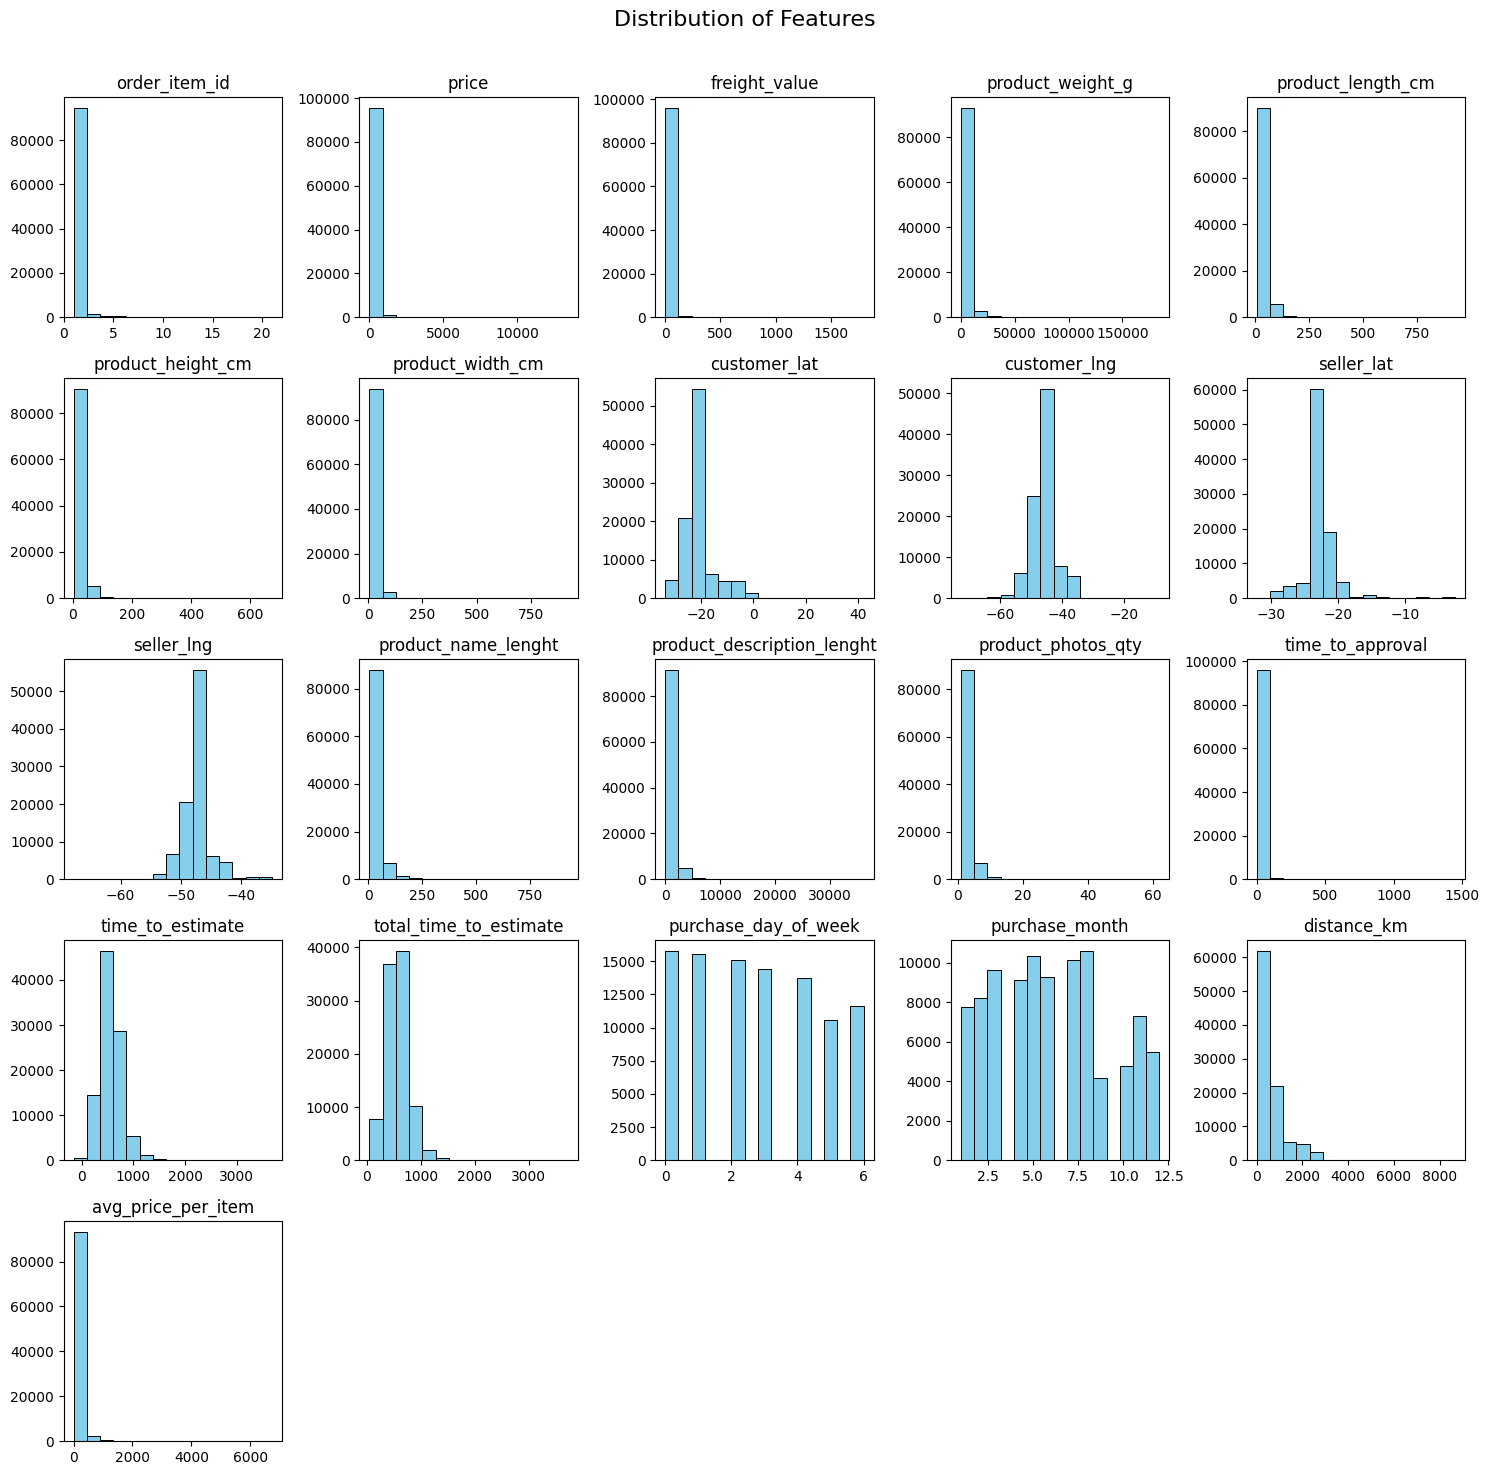

In [20]:
# Set figure size and layout
plt.figure(figsize=(15, 15))

# Plot histograms with customization for a cleaner look
data.hist(bins=15, color='skyblue', edgecolor='black', linewidth=0.7, grid=False, figsize=(15, 15))
plt.suptitle('Distribution of Features', fontsize=16)

# Display plot
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

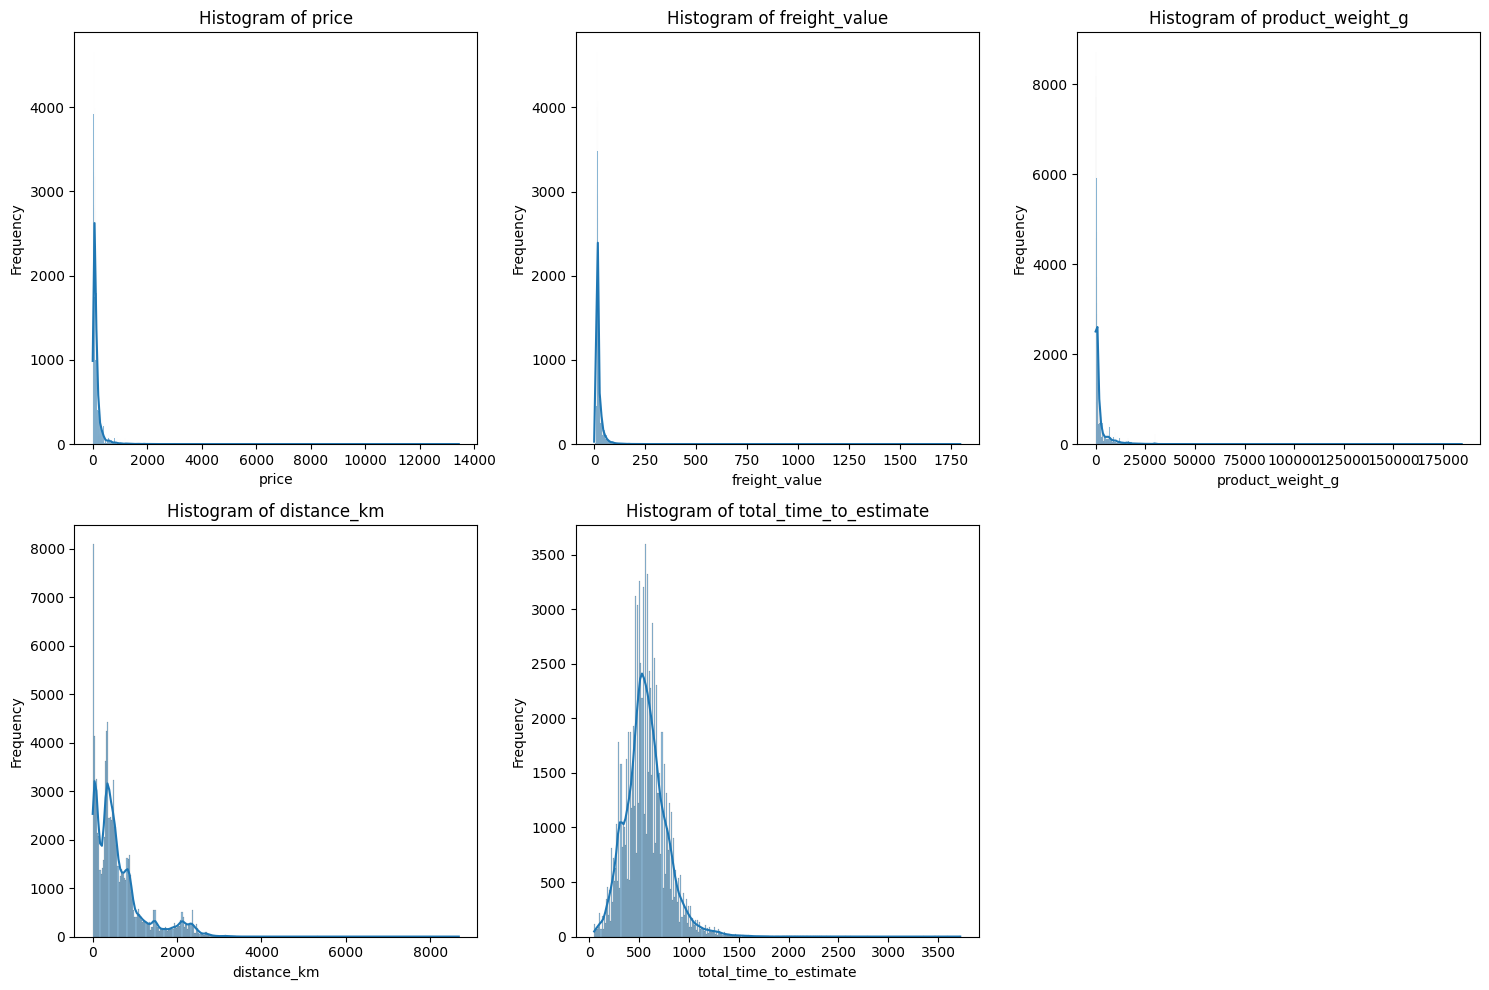

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous features
continuous_features = ['price', 'freight_value', 'product_weight_g', 'distance_km', 'total_time_to_estimate']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


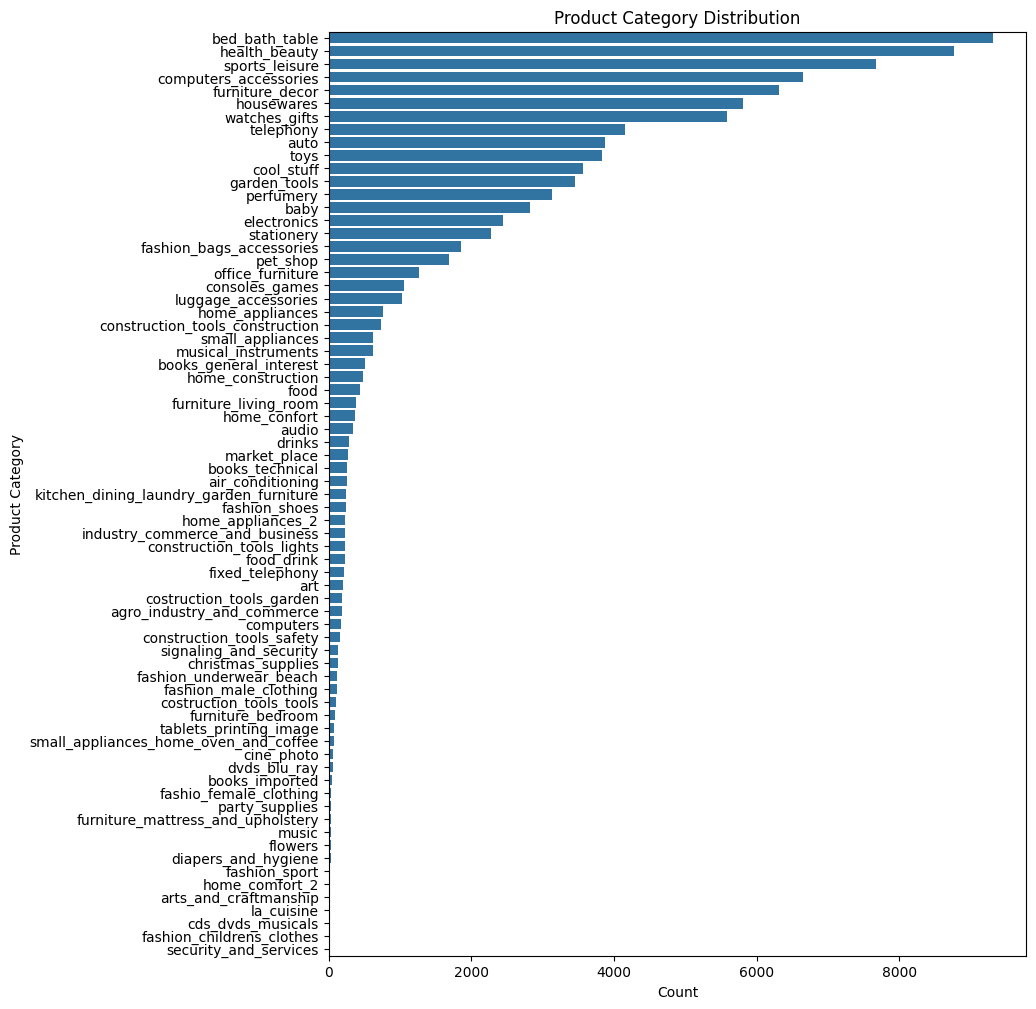

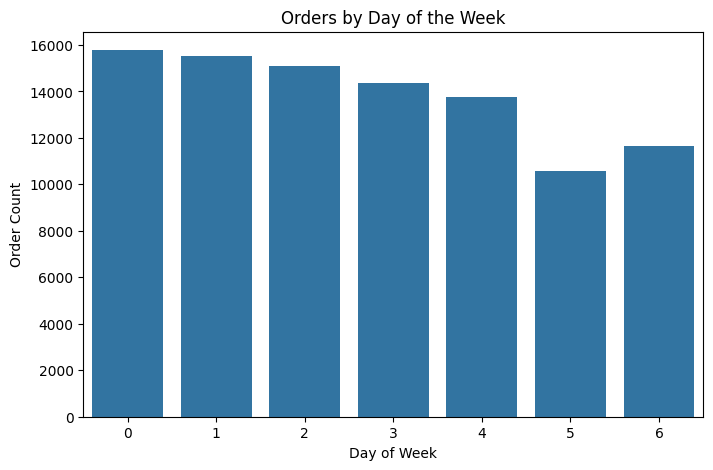

In [22]:
# Bar chart for product categories
plt.figure(figsize=(9, 12))
sns.countplot(data=data, y='product_category_name_english', order=data['product_category_name_english'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

# Bar chart for purchase day of the week
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='purchase_day_of_week')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Order Count')
plt.show()


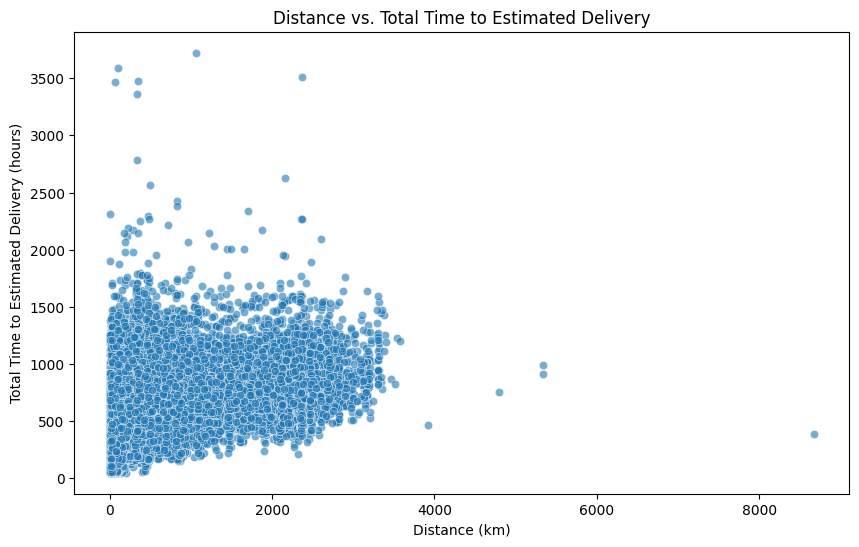

In [23]:
# Scatter plot for distance vs. total time to estimated delivery
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='distance_km', y='total_time_to_estimate', alpha=0.6)
plt.title('Distance vs. Total Time to Estimated Delivery')
plt.xlabel('Distance (km)')
plt.ylabel('Total Time to Estimated Delivery (hours)')
plt.show()


#### Статистические сводки: Предоставьте информацию, используя среднее, медиану, моду и стандартное отклонение.

In [24]:
# Calculate mean, median, mode, and standard deviation for numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Mean
mean_values = data[numerical_features].mean()

# Median
median_values = data[numerical_features].median()

# Mode (for each feature, as mode can have multiple values, we'll select the first mode for simplicity)
mode_values = data[numerical_features].mode().iloc[0]

# Standard Deviation
std_dev_values = data[numerical_features].std()

# Display all statistical summaries in a single DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_dev_values
})

summary_stats


,Mean,Median,Mode,Standard Deviation
order_item_id,1.141598,1.000000,1.000000,0.538587
price,137.894205,86.420000,59.900000,210.719331
freight_value,22.852019,17.200000,15.100000,21.722069
product_weight_g,2395.503415,750.000000,200.000000,4780.889174
product_length_cm,34.478906,27.000000,16.000000,26.193475
product_height_cm,19.003554,14.000000,10.000000,19.999698
product_width_cm,26.293198,20.000000,20.000000,18.888677
customer_lat,-21.186186,-22.924015,-23.012987,5.613464
customer_lng,-46.169675,-46.630291,-43.465520,4.057961
seller_lat,-22.791474,-23.416264,-21.757321,2.751683


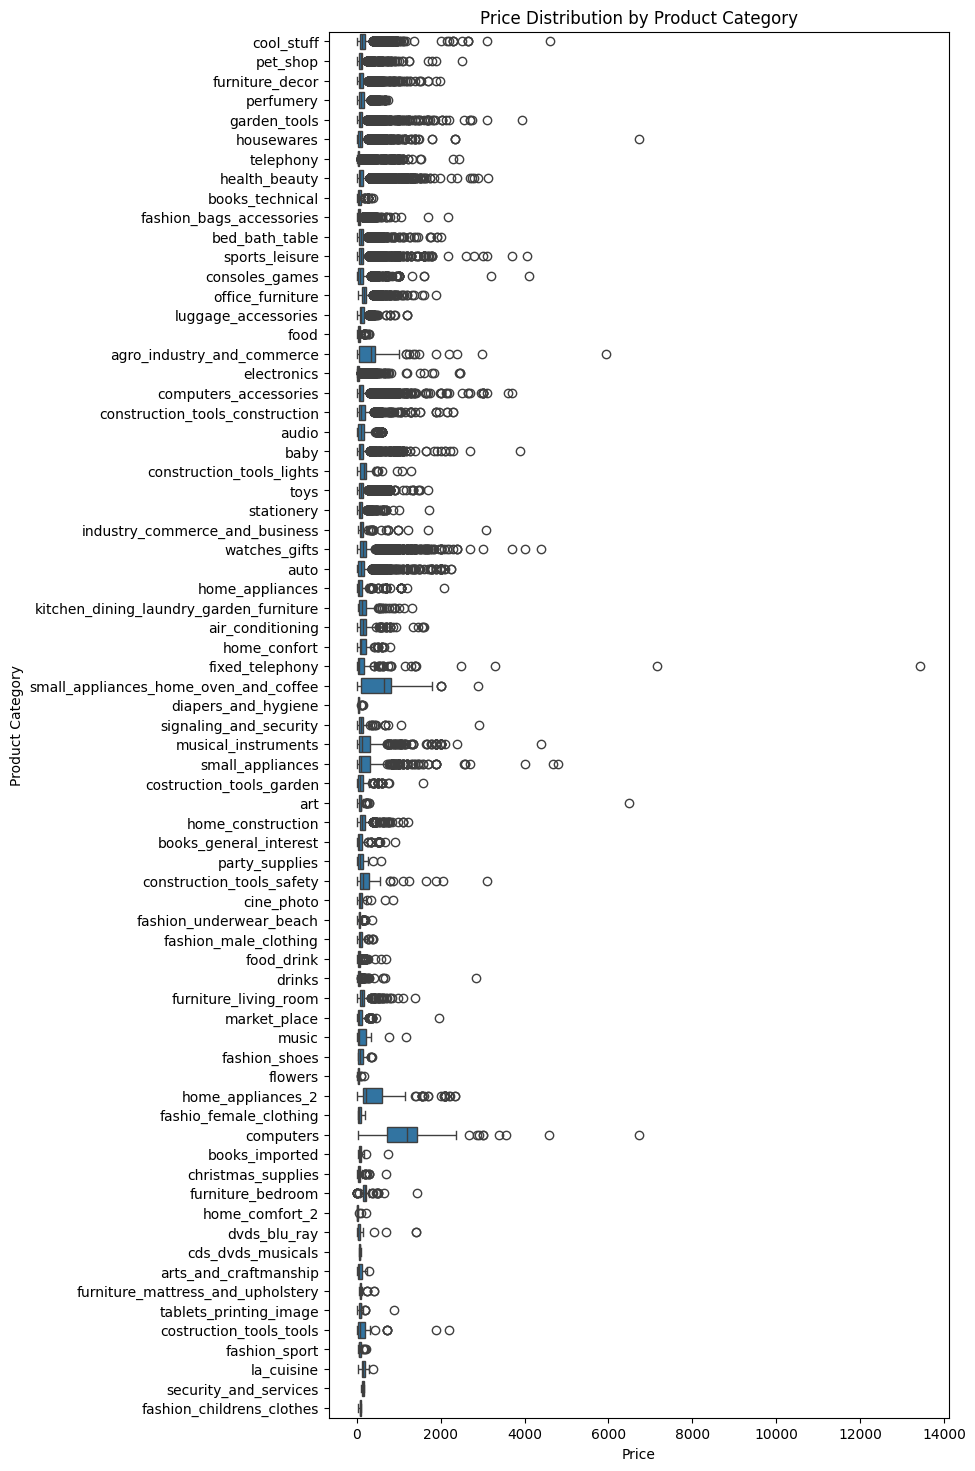

In [25]:
plt.figure(figsize=(8, 18))
sns.boxplot(data=data, y='product_category_name_english', x='price')
plt.title('Price Distribution by Product Category')
plt.xlabel('Price')
plt.ylabel('Product Category')
plt.show()


#### Анализ корреляций: Определите взаимосвязи между переменными.

In [26]:
data

,in_time,order_item_id,price,freight_value,customer_city,customer_state,seller_city,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_lat,customer_lng,seller_lat,seller_lng,product_name_lenght,product_description_lenght,product_photos_qty,time_to_approval,time_to_estimate,total_time_to_estimate,purchase_day_of_week,purchase_month,distance_km,same_city,same_state,avg_price_per_item,product_category_name_english
0,True,1,58.90,13.29,campos dos goytacazes,RJ,volta redonda,SP,650.0,28.0,9.0,14.0,-21.762775,-41.309633,-22.496953,-44.127492,58.0,598.0,4.0,0.775833,374.240278,375.016111,2,9,301.504681,False,False,58.90,cool_stuff
1,True,1,239.90,19.93,santa fe do sul,SP,sao paulo,SP,30000.0,50.0,30.0,40.0,-20.220527,-50.903424,-23.565096,-46.518565,56.0,239.0,2.0,0.201944,444.913056,445.115000,2,4,585.563937,False,True,239.90,pet_shop
2,True,1,199.00,17.87,para de minas,MG,borda da mata,MG,3050.0,33.0,13.0,33.0,-19.870305,-44.593326,-22.262584,-46.171124,59.0,695.0,2.0,0.249722,513.191667,513.441389,6,1,312.343511,False,True,199.00,furniture_decor
3,True,1,12.99,12.79,atibaia,SP,franca,SP,200.0,16.0,10.0,15.0,-23.089925,-46.611654,-20.553624,-47.387359,42.0,480.0,1.0,0.161944,277.828333,277.990278,2,8,293.168420,False,True,12.99,perfumery
4,True,1,199.90,18.14,varzea paulista,SP,loanda,PR,3750.0,35.0,40.0,30.0,-23.243402,-46.827614,-22.929384,-53.135873,59.0,409.0,1.0,0.206111,969.829722,970.035833,5,2,646.163463,False,False,199.90,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96776,True,1,299.99,43.41,sao luis,MA,itajai,SC,10150.0,89.0,15.0,40.0,-2.497993,-44.297761,-26.912574,-48.673980,43.0,1002.0,3.0,38.231944,547.816389,586.048333,0,4,2754.537709,False,False,299.99,housewares
96777,True,1,350.00,36.53,curitiba,PR,sao paulo,SP,8950.0,45.0,26.0,38.0,-25.566904,-49.309115,-23.535864,-46.642819,31.0,232.0,1.0,66.083889,355.470000,421.553889,5,7,351.729420,False,False,350.00,computers_accessories
96778,True,1,99.90,16.95,sao paulo,SP,curitiba,PR,967.0,21.0,24.0,19.0,-23.597794,-46.643923,-25.469955,-49.289821,43.0,869.0,1.0,24.108056,390.759722,414.867778,0,10,339.056961,False,False,99.90,sports_leisure
96779,True,1,55.99,8.72,vinhedo,SP,sao paulo,SP,100.0,20.0,20.0,20.0,-23.040252,-46.979782,-23.635530,-46.694031,56.0,1306.0,1.0,1.025833,239.924444,240.950278,0,8,72.335998,False,True,55.99,computers_accessories


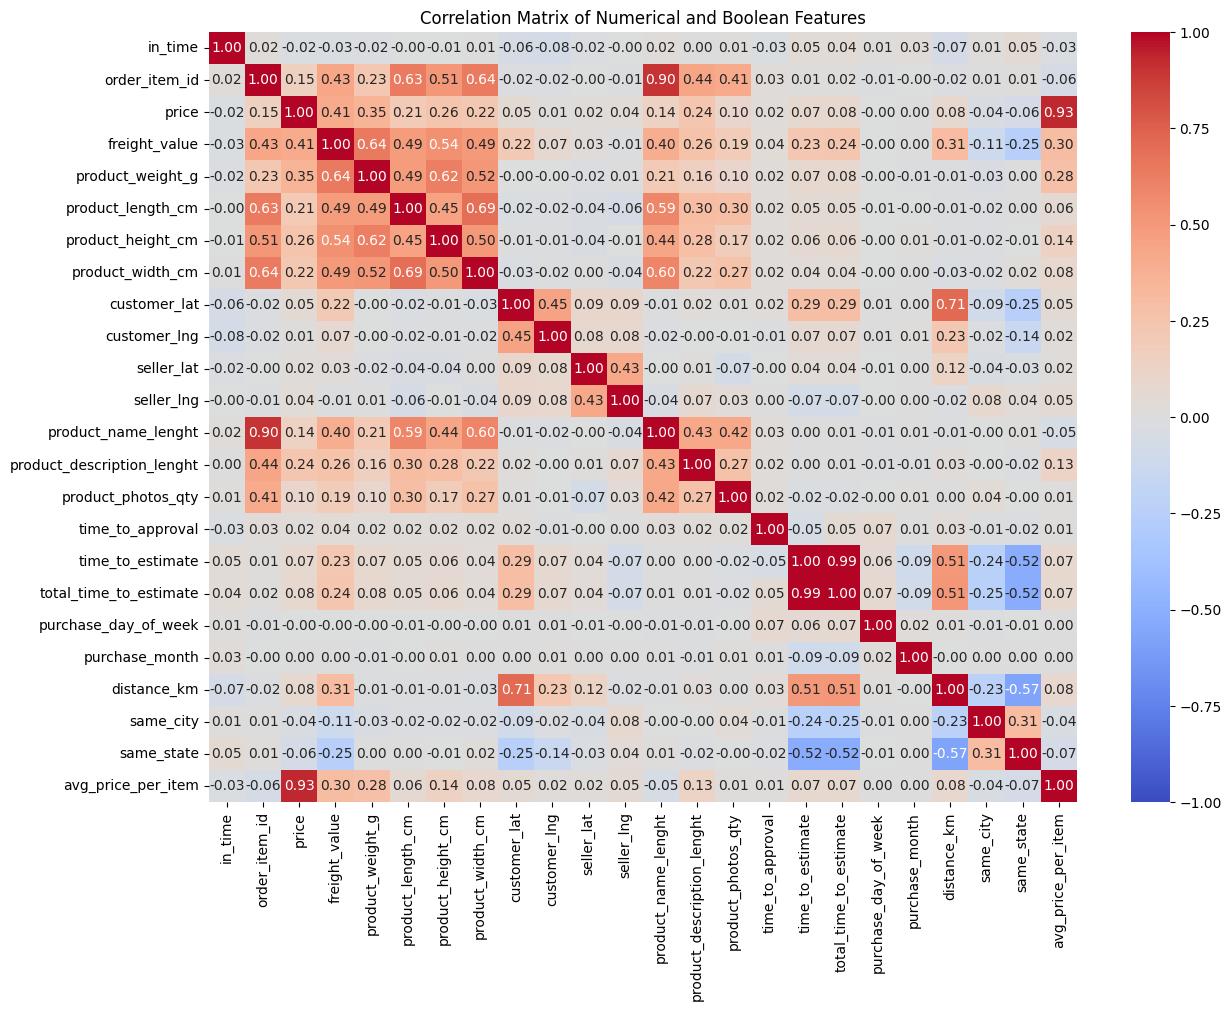

Correlation of features with 'in_time':
 in_time                       1.000000
same_state                    0.051135
time_to_estimate              0.045054
total_time_to_estimate        0.041939
purchase_month                0.027686
product_name_lenght           0.018002
order_item_id                 0.017422
purchase_day_of_week          0.012936
product_photos_qty            0.012283
same_city                     0.011053
product_width_cm              0.005073
product_description_lenght    0.004882
product_length_cm            -0.001526
seller_lng                   -0.004763
product_height_cm            -0.006473
product_weight_g             -0.016802
seller_lat                   -0.022865
price                        -0.023966
freight_value                -0.027503
avg_price_per_item           -0.029800
time_to_approval             -0.030894
customer_lat                 -0.058751
distance_km                  -0.066653
customer_lng                 -0.078110
Name: in_time, dtype: f

In [27]:
# Drop only object (categorical) data types to retain boolean and numerical features
data_numeric_boolean = data.select_dtypes(exclude=['object'])

# Calculate correlation matrix for numerical and boolean features
correlation_matrix = data_numeric_boolean.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical and Boolean Features')
plt.show()

# Display specific correlations with 'in_time' for easy inspection
target_correlations = correlation_matrix['in_time'].sort_values(ascending=False)
print("Correlation of features with 'in_time':\n", target_correlations)



In [28]:
data.dropna(inplace=True)

### 4. Подходы к машинному обучению:

#### Классификационные модели:
- Цель: Классификация заказов как доставленных вовремя или с опозданием.
- Алгоритмы: Логистическая регрессия, метод ближайших соседей, метод опорных векторов.

In [29]:
from catboost import CatBoostClassifier

### 5. Реализация моделей:

#### Разделение данных: Демонстрация train-test split.

In [39]:
from catboost import CatBoostClassifier, cv, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate target and features
target = 'in_time'
X = data.drop(columns=[target])
y = data[target]

# Identify categorical features for CatBoost
categorical_features = X.select_dtypes(include=['bool', 'object']).columns.tolist()

# First split: separate a final test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create CatBoost Pool for train data
train_pool_full = Pool(X_train_full, label=y_train_full, cat_features=categorical_features)
test_pool = Pool(X_test, label=y_test, cat_features=categorical_features)

# Initialize CatBoost Classifier
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    eval_metric='Accuracy',
    loss_function='Logloss',  # Specify loss function here
    random_seed=42,
    verbose=50
)

# Perform cross-validation on the training set
cv_results = cv(
    Pool(X_train_full, y_train_full, cat_features=categorical_features),
    model.get_params(),
    fold_count=5,  # 5-fold cross-validation
    stratified=True,
    plot=True
)

# Train the model on the entire training data after cross-validation
model.fit(train_pool_full)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.8989729	test: 0.8988568	best: 0.8988568 (0)	total: 43.6ms	remaining: 21.8s
50:	learn: 0.8997804	test: 0.8996964	best: 0.8996964 (50)	total: 2.58s	remaining: 22.8s
100:	learn: 0.9011207	test: 0.9011174	best: 0.9012465 (95)	total: 4.97s	remaining: 19.6s
150:	learn: 0.9021543	test: 0.9017632	best: 0.9020862 (140)	total: 7.31s	remaining: 16.9s
200:	learn: 0.9035592	test: 0.9024737	best: 0.9024737 (200)	total: 9.54s	remaining: 14.2s
250:	learn: 0.9053033	test: 0.9031196	best: 0.9032487 (242)	total: 11.8s	remaining: 11.7s
300:	learn: 0.9062884	test: 0.9033133	best: 0.9033779 (276)	total: 14.5s	remaining: 9.56s
350:	learn: 0.9072411	test: 0.9026674	best: 0.9033779 (276)	total: 16.5s	remaining: 7.02s
400:	learn: 0.9084200	test: 0.9028612	best: 0.9033779 (276)	total: 18.7s	remaining: 4.61s
450:	learn: 0.9094374	test: 0.9031196	best: 0.9033779 (276)	total: 21s	remaining: 2.28s
499:	learn: 0.9104386	test: 0.9032487	best: 0.9034425 (466)	total: 23.1s	remaining: 0

#### Прогнозирование: Показать, как делать прогнозы на тестовых данных.

In [40]:
# Final evaluation on the test set
y_pred = model.predict(test_pool)

#### Оценка: Используйте метрики, такие как RMSE для регрессии и accuracy или F1-score для классификации.

In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display final test set results
print("Final Test Set Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Final Test Set Evaluation:
Accuracy: 0.9015
Precision: 0.9055
Recall: 0.9942
F1 Score: 0.9478


### 6. Визуализация результатов:

#### Метрики производительности: Постройте матрицы ошибок, ROC-кривые или важность признаков.

<Figure size 600x600 with 0 Axes>

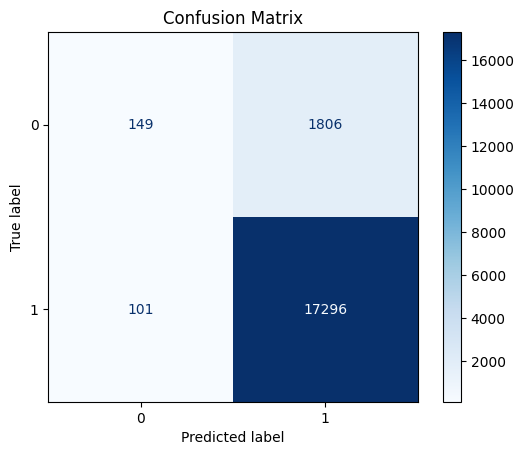

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = model.predict(test_pool)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


### 7. Интерпретация результатов:

Бизнес-инсайты: Переведите результаты моделей в конкретные бизнес-стратегии.

Ограничения: Обсудите возможные предвзятости или ограничения данных.

#### Повышение Точности Прогнозов: Решение Проблемы Несбалансированных Прогнозов

В этом анализе мы стремимся предсказать, будут ли заказы доставлены вовремя. Наша модель достигла высокой полноты (recall), что означает, что она правильно определила большинство своевременных доставок. Однако она склонна классифицировать почти все заказы как «вовремя», что приводит к высокому количеству ложных срабатываний (когда модель ошибочно прогнозирует доставку вовремя, хотя она опоздала). Это приводит к высокой полноте, но более низкой точности (precision).

    В бизнес-контексте этот дисбаланс может иметь значительные последствия:

- Переоценка своевременных доставок: Если модель ошибочно классифицирует опоздавшие заказы как «вовремя», это может привести к невыполнению ожиданий клиентов, снижая их удовлетворенность и доверие.

- Распределение ресурсов: Ошибочная классификация может повлиять на распределение ресурсов, особенно в логистике и службе поддержки. Например, опоздавшие заказы могут потребовать дополнительного вмешательства, общения с клиентами или компенсации.

- Удержание клиентов и лояльность: Точные прогнозы своевременной доставки являются критически важными для лояльности клиентов в электронной коммерции. Модель, которая переоценивает количество своевременных доставок, может привести к неудовлетворенности клиентов, если обещания не будут выполнены.

    Для повышения точности (и, таким образом, сокращения ложных срабатываний) мы исследовали несколько решений:

Регулировка Порога Классификации:

        По умолчанию модель классифицирует прогнозы как «вовремя», если вероятность больше 0,5.
        Увеличение этого порога (например, до 0,7) означает, что модель требует более высокого уровня уверенности для классификации заказа как «вовремя». Этот подход помогает приоритизировать точность, снижая количество ложных срабатываний за счёт уменьшения числа заказов, помеченных как «вовремя».
        Компромисс: Увеличение порога обычно приводит к снижению полноты (recall) (то есть большее количество истинных случаев своевременной доставки может быть классифицировано как опоздание). Этот баланс требует внимательного рассмотрения в зависимости от бизнес-приоритетов между точностью и полнотой.

    Применение Весов Классов:
        Присваивая более высокий вес классу «опоздание» при обучении, мы можем уменьшить склонность модели к прогнозированию «вовремя».
        Весы классов помогают модели уделять больше внимания меньшинственному классу (опоздавшие заказы), что потенциально может улучшить точность.
        Компромисс: Хотя этот подход повышает точность, он может увеличить риск возникновения большего количества ложных отрицаний (предсказания опоздания, когда доставка на самом деле была вовремя), что может повлиять на другие бизнес-процессы.

    Использование Метрики Оценки, Оптимизированной для Точности:
        Установка метрики «Precision» в качестве метрики оценки фокусирует оптимизацию модели на минимизации ложных срабатываний.
        Этот подход особенно полезен, если стоимость переоценки своевременных доставок высока в бизнес-контексте.
        Компромисс: Приоритизация точности может привести к снижению полноты, что означает, что модель может пропустить некоторые истинные своевременные доставки. Это требует тщательного баланса, основываясь на относительной важности точности и полноты в бизнесе.

Влияние Оптимизации Точности на Бизнес

    Оптимизация точности важна для бизнеса, где переоценка может привести к негативным последствиям для клиентов и операций. Правильный баланс между точностью и полнотой может повлиять на:

- Опыт клиентов: Точные прогнозы позволяют надежно информировать клиентов о времени доставки, что способствует укреплению доверия.

- Операционная эффективность: Повышение точности гарантирует правильное распределение ресурсов, сокращая затраты, связанные с управлением жалобами клиентов или корректировкой логистики для опоздавших заказов.

- Репутация и Лояльность к Бренду: Регулярное выполнение обещанных сроков доставки улучшает репутацию бренда и лояльность клиентов, что приводит к повышению уровня удержания.

**Такой подход к оптимизации точности позволяет бизнесу делать более точные, надежные прогнозы по доставке, что напрямую влияет на удовлетворенность клиентов и операционную эффективность.**

In [43]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(test_pool)[:, 1]

# Set a new threshold (e.g., 0.7) to prioritize precision
new_threshold = 0.7
y_pred_adjusted = np.where(y_pred_proba >= new_threshold, 1, 0)

# Recalculate metrics with the adjusted threshold
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print(f"Adjusted Threshold ({new_threshold}) Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Adjusted Threshold (0.7) Metrics:
Precision: 0.9188
Recall: 0.9668
F1 Score: 0.9422


<Figure size 600x600 with 0 Axes>

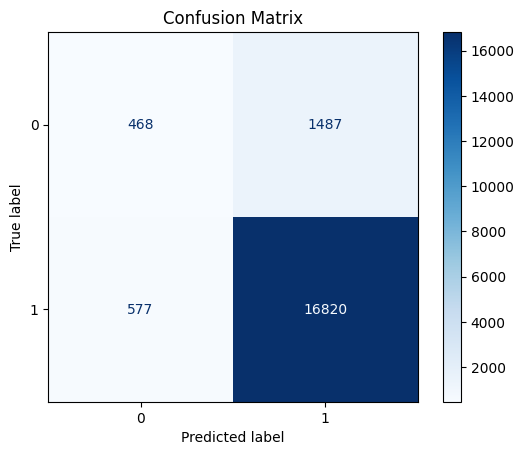

In [44]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


0:	learn: 0.8168560	total: 37.9ms	remaining: 18.9s
50:	learn: 0.8272516	total: 2.02s	remaining: 17.7s
100:	learn: 0.8316281	total: 4.01s	remaining: 15.9s
150:	learn: 0.8354766	total: 6s	remaining: 13.9s
200:	learn: 0.8388792	total: 7.84s	remaining: 11.7s
250:	learn: 0.8422584	total: 9.74s	remaining: 9.66s
300:	learn: 0.8451448	total: 11.7s	remaining: 7.76s
350:	learn: 0.8483010	total: 13.6s	remaining: 5.76s
400:	learn: 0.8506007	total: 15.4s	remaining: 3.8s
450:	learn: 0.8530647	total: 17.3s	remaining: 1.88s
499:	learn: 0.8562679	total: 19.1s	remaining: 0us
Adjusted Threshold (0.7) Metrics:
Precision: 0.9134
Recall: 0.9780
F1 Score: 0.9446


<Figure size 600x600 with 0 Axes>

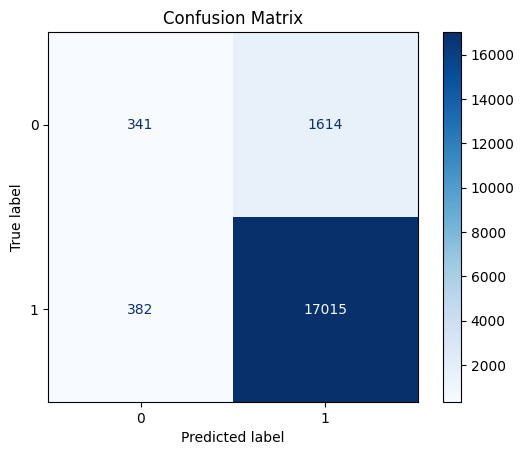

In [47]:
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',
    loss_function='Logloss',
    random_seed=42,
    class_weights=[2, 1],  # Adjust weight for classes (higher weight on the negative class)
    verbose=50
)
model.fit(train_pool_full)

# Generate predictions on the test set
y_pred = model.predict(test_pool)

# Recalculate metrics with the adjusted threshold
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Adjusted Threshold ({new_threshold}) Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


0:	learn: 0.8178221	total: 46.2ms	remaining: 23s
50:	learn: 0.8301221	total: 1.92s	remaining: 16.9s
100:	learn: 0.8366407	total: 3.89s	remaining: 15.4s
150:	learn: 0.8414029	total: 5.83s	remaining: 13.5s
200:	learn: 0.8449907	total: 7.78s	remaining: 11.6s
250:	learn: 0.8482668	total: 9.68s	remaining: 9.61s
300:	learn: 0.8509860	total: 11.6s	remaining: 7.64s
350:	learn: 0.8537481	total: 13.5s	remaining: 5.72s
400:	learn: 0.8558784	total: 15.4s	remaining: 3.8s
450:	learn: 0.8578470	total: 17.3s	remaining: 1.88s
499:	learn: 0.8607127	total: 19.3s	remaining: 0us
Adjusted Threshold (0.7) Metrics:
Precision: 0.9134
Recall: 0.9780
F1 Score: 0.9446


<Figure size 600x600 with 0 Axes>

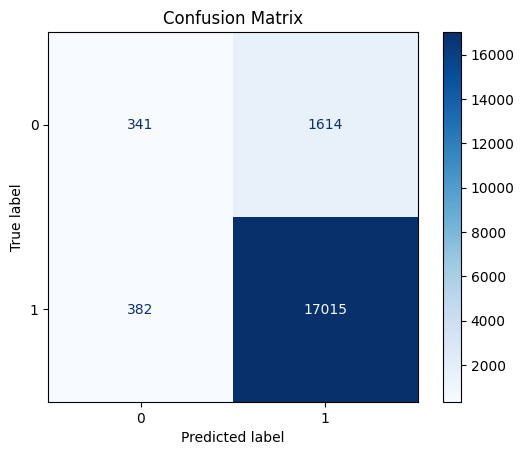

In [48]:
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='Precision',
    loss_function='Logloss',
    random_seed=42,
    class_weights=[2, 1],  # Adjust weight for classes (higher weight on the negative class)
    verbose=50
)
model.fit(train_pool_full)

# Generate predictions on the test set
y_pred = model.predict(test_pool)

# Recalculate metrics with the adjusted threshold
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Adjusted Threshold ({new_threshold}) Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


### 8. Заключение:

Итог: Подытожьте ключевые выводы и использованные методы.

Следующие шаги: Предложите направления для дальнейших исследований, такие как глубокое обучение или анализ временных рядов.

Итог: В ходе работы мы разработали модель для прогнозирования своевременности доставки заказов. Были проведены ключевые этапы анализа данных, включающие исследовательский анализ данных (EDA), обработку данных, создание новых признаков и настройку модели с использованием CatBoost. Мы также рассмотрели методы повышения точности, чтобы улучшить качество предсказаний и минимизировать ложные срабатывания.

    Ключевые этапы:

- Предобработка данных: Очистка данных и формирование новых признаков, таких как временные разницы между этапами заказа и расстояние между клиентом и продавцом.

- Исследовательский анализ данных: Построение гистограмм, матрицы корреляций и анализа категориальных данных для лучшего понимания структуры данных.
    
- Обучение модели: Применение алгоритма CatBoost для обработки данных, включающих числовые и категориальные признаки.
    
- Оптимизация precision: Мы исследовали методы повышения precision, такие как регулировка порога классификации, применение весов классов и оптимизация метрики оценки для precision.

**Эти шаги позволили создать модель, которая может точно предсказывать своевременность доставки, а также оптимизировать баланс между точностью и полнотой предсказаний для более надежных результатов.**

### 9. Приложение:
Ресурсы: Список дополнительных материалов для чтения или учебных пособий.

    Документация и учебные пособия по CatBoost:

- CatBoost Documentation https://catboost.ai/en/docs/ - Официальная документация CatBoost, включающая руководство по установке, настройке гиперпараметров и примеры кода.

- Справочник по машинному обучению https://education.yandex.ru/handbook/ml – Это бесплатный справочник по основам машинного обучения от Яндекса, охватывающий ключевые концепции и алгоритмы, включая регрессию, классификацию, кластеризацию и рекомендации. Содержит объяснения с примерами, визуализациями и интерактивными элементами, что делает его отличным источником как для начинающих, так и для более опытных специалистов. Подходит для тех, кто хочет углубить свои знания в машинном обучении с упором на практическое применение.